In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cancer-data.csv')

# Use mapping (1 for M/malignant, else B/benign)
mapping = {'M': 1, 'B': 0}

dataset['diagnosis'] = dataset['diagnosis'].map(mapping)
# Extract features (X) and target variable (y)
X = dataset.iloc[:, :-1].values
y = dataset['diagnosis'].values


print(X.shape)
print(y)

(569, 9)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0

# Add random noise

In [4]:
np.random.seed(42)
noise = np.random.normal(0, 0.5, size=X.shape)
X_noisy = X + noise

# Describe the dataset

In [5]:
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,1


In [6]:
dataset.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,1
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   radius_mean          569 non-null    float64
 1   texture_mean         569 non-null    float64
 2   perimeter_mean       569 non-null    float64
 3   area_mean            569 non-null    float64
 4   smoothness_mean      569 non-null    float64
 5   compactness_mean     569 non-null    float64
 6   concavity_mean       569 non-null    float64
 7   concave points_mean  569 non-null    float64
 8   symmetry_mean        569 non-null    float64
 9   diagnosis            569 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 44.6 KB


# Split the dataset into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

# Feature scaling

In [8]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model with L1 and L2 regularization

In [9]:
# Train logistic regression models with L1 and L2 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs')

model_l1.fit(X_train, y_train)
model_l2.fit(X_train, y_train)

LogisticRegression()

# Predictions

In [10]:
y_pred_l1 = model_l1.predict(X_test)
y_pred_l2 = model_l2.predict(X_test)

# Evaluate the models

In [11]:
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

print("Accuracy of L1 regularization: {:.2f}%".format(accuracy_l1 * 100))
print("Accuracy of L2 regularization: {:.2f}%".format(accuracy_l2 * 100))

Accuracy of L1 regularization: 92.98%
Accuracy of L2 regularization: 92.11%


# Confusion Matrix and Classification Report for L1 regularization

In [12]:
print("\nConfusion Matrix for L1 regularization:\n", confusion_matrix(y_test, y_pred_l1))
print("\nClassification Report for L1 regularization:\n", classification_report(y_test, y_pred_l1))


Confusion Matrix for L1 regularization:
 [[68  3]
 [ 5 38]]

Classification Report for L1 regularization:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



# Confusion Matrix and Classification Report for L2 regularization

In [13]:
print("\nConfusion Matrix for L2 regularization:\n", confusion_matrix(y_test, y_pred_l2))
print("\nClassification Report for L2 regularization:\n", classification_report(y_test, y_pred_l2))


Confusion Matrix for L2 regularization:
 [[68  3]
 [ 6 37]]

Classification Report for L2 regularization:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



#ROC Curve for L1 Regularization

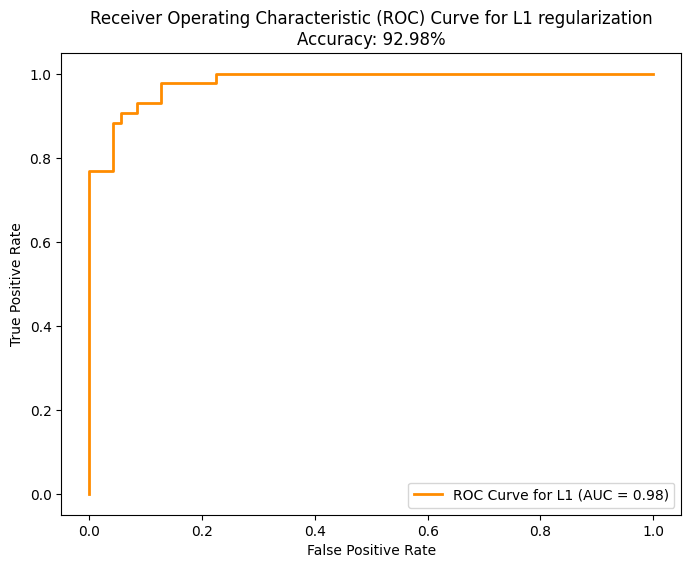

In [16]:
y_prob_l1 = model_l1.predict_proba(X_test)[:, 1]
fpr_l1, tpr_l1, thresholds_l1 = roc_curve(y_test, y_prob_l1)
roc_auc_l1 = auc(fpr_l1, tpr_l1)

plt.figure(figsize=(8, 6))
plt.plot(fpr_l1, tpr_l1, color='darkorange', lw=2,
         label=f'ROC Curve for L1 (AUC = {roc_auc_l1:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for L1 regularization\nAccuracy: {:.2f}%'.format(
    accuracy_l1 * 100))
plt.legend(loc="lower right")
plt.show()

# ROC Curve for L2 Regularization

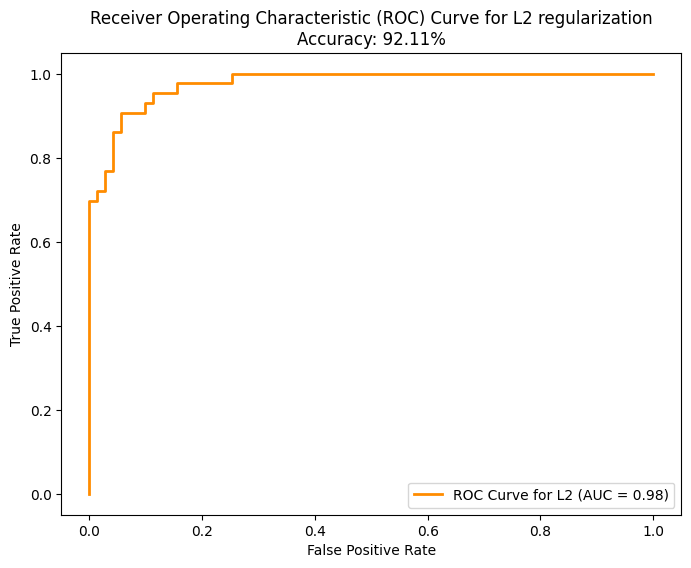

In [15]:
y_prob_l2 = model_l2.predict_proba(X_test)[:, 1]
fpr_l2, tpr_l2, thresholds_l2 = roc_curve(y_test, y_prob_l2)
roc_auc_l2 = auc(fpr_l2, tpr_l2)

plt.figure(figsize=(8, 6))
plt.plot(fpr_l2, tpr_l2, color='darkorange', lw=2,
         label=f'ROC Curve for L2 (AUC = {roc_auc_l2:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for L2 regularization\nAccuracy: {:.2f}%'.format(
    accuracy_l2 * 100))
plt.legend(loc="lower right")
plt.show()